In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
df = pd.read_excel(r"E:\PythonCore\datafiles\Social_Network_Ads.xlsx")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284 entries, 0 to 283
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Age        284 non-null    int64
 1   Salary     284 non-null    int64
 2   Purchased  284 non-null    int64
dtypes: int64(3)
memory usage: 6.8 KB


In [4]:
df.head()

,Age,Salary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,47,25000,1
4,27,57000,0


In [5]:
# Preprocessing - Standardise data

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
X = df.iloc[:,[0,1]].values
y = df.iloc[:,-1].values
print(X.shape, y.shape)

(284, 2) (284,)


In [8]:
s = StandardScaler()
# The standard score of a sample `x` is calculated as:
# z = (x - u) / s

In [9]:
X_sc = s.fit_transform(X)

In [17]:
# View 1st 2 rows
X_sc[0:2,:]

array([[-2.13648148, -1.50856282],
       [-0.56456246, -1.48090064]])

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_sc,y,test_size=0.2, random_state=64)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(227, 2) (57, 2) (227,) (57,)


In [19]:
from sklearn.neighbors import KNeighborsClassifier

In [20]:
# sqrt of length of training data - Practioners rule for K

In [21]:
227**0.5

15.066519173319364

In [22]:
model = KNeighborsClassifier(n_neighbors=15)
model.fit(X_train, y_train)
yhat = model.predict(X_test)
print(accuracy_score(y_test, yhat))

0.9298245614035088


In [25]:
 from sklearn.model_selection import GridSearchCV

In [29]:
grid = {'n_neighbors':[5,7,9,15,21,30],
       'p':[1,2,3,4]
       }

In [30]:
# Exhaustive search over specified parameter values for an estimator.
grid_model = GridSearchCV(model, grid)
grid_model.fit(X_train, y_train)
grid_model.best_params_

{'n_neighbors': 7, 'p': 2}

In [31]:
final_model = KNeighborsClassifier(n_neighbors=7)
final_model.fit(X_train, y_train)
yhat = final_model.predict(X_test)
print(accuracy_score(y_test, yhat))

0.9122807017543859


In [33]:
from sklearn.model_selection import cross_val_score

In [41]:
scores = cross_val_score(final_model, X_sc, y, cv=5)
print("Average accuracy is:",scores.mean().round(2)," with +- standard deviation", scores.std().round(2))

Average accuracy is: 0.9  with +- standard deviation 0.08


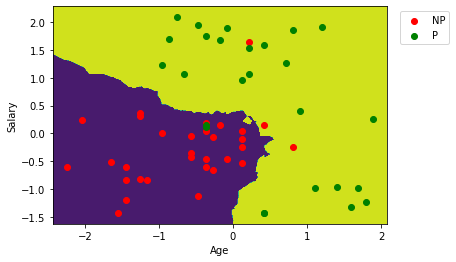

In [32]:
# Creation of the mesh
age = np.arange(X_test[:,0].min()-0.2, X_test[:,0].max()+0.2,0.01)
sal = np.arange(X_test[:,1].min()-0.2, X_test[:,1].max()+0.2,0.01)
Age, Sal = np.meshgrid(age,sal)
# Convert2D to 1D and concatenate the 2 arrays
formed_data = np.c_[Age.ravel(), Sal.ravel()]
formed_data.shape
ans = final_model.predict(formed_data)
ans = ans.reshape(Age.shape)
mask_for_NP = y_test == 0
mask_for_P = y_test == 1
plt.contourf(Age, Sal, ans)
plt.scatter(X_test[mask_for_NP,0],X_test[mask_for_NP,1], c='r', label="NP")
plt.scatter(X_test[mask_for_P,0],X_test[mask_for_P,1], c='g', label="P")
# purchased and not purchased points to be colored separately
plt.xlabel("Age")
plt.ylabel("Salary")
plt.legend(bbox_to_anchor=(1.2,1))
plt.show()